# Prework

Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

Chargeons le dataframe

In [2]:
data = pd.read_csv('../raw_data/data_full.csv')

In [3]:
data.head(20)

,steam_appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,0,0,0,0,0,0,0,0,550
1,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,0,0,0,0,0,5,122,0,0,0
2,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,0,0,0,0,0,0,0,0,0,0
3,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,...,0,0,0,0,0,0,0,0,0,0
4,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,0,0,0,0,0,0,0,0,0,0
5,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,...,0,0,0,0,0,0,0,0,63,0
6,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,...,0,0,0,0,0,0,0,0,607,0
7,240,Counter-Strike: Source,2004-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Cross-Platform Multiplayer;Steam ...,Action,...,0,0,0,0,0,0,0,0,0,400
8,300,Day of Defeat: Source,2010-07-12,1,Valve,Valve,windows;mac;linux,0,Multi-player;Cross-Platform Multiplayer;Steam ...,Action,...,0,0,0,0,0,0,272,0,0,0
9,340,Half-Life 2: Lost Coast,2005-10-27,1,Valve,Valve,windows;mac;linux,0,Single-player;Commentary available,Action,...,0,0,0,0,0,0,0,0,0,0


# Retrait des colonnes non pertinentes

Les colonnes de requirements sont abandonnées car peu pertinantes dans l'analyse du prix et des owners.

In [4]:
data.drop(columns=['pc_requirements', 'mac_requirements', 'linux_requirements', 'minimum', 'recommended'], inplace=True)

De même les colonnes de support sont peu pertinantes pour nous.

In [5]:
data.drop(columns=['support_email', 'support_url'], inplace=True)

La colonne "movies" serait un peu trop complexe à analyser pour le moment, puisque qu'elle comprend des vidéos, et est très incomplète. 

In [6]:
data.drop(columns=['movies'], inplace=True)

La colonne "age" semble très incomplète. C'est pourquoi nous ne la prendront pas en compte.

In [7]:
data['required_age'].value_counts()

0     26284
18      307
16      187
12       67
7        12
3        11
Name: required_age, dtype: int64

In [8]:
data.drop(columns=['required_age'], inplace=True)

# Analyse des colonnes restantes

Il n'y a presque plus de valeurs manquantes et/ou nulles. (à l'exception de la colonne 'website')

In [9]:
obj = data.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)

steam_appid , 0
name , 0
release_date , 0
english , 0
developer , 0
publisher , 0
platforms , 0
categories , 0
genres , 0
steamspy_tags , 0
achievements , 0
positive_ratings , 0
negative_ratings , 0
average_playtime , 0
median_playtime , 0
owners , 0
price , 0
detailed_description , 0
about_the_game , 0
short_description , 0
header_image , 0
screenshots , 0
background , 0
website , 8988
1980s , 0
1990s , 0
2.5d , 0
2d , 0
2d_fighter , 0
360_video , 0
3d , 0
3d_platformer , 0
3d_vision , 0
4_player_local , 0
4x , 0
6dof , 0
atv , 0
abstract , 0
action , 0
action_rpg , 0
action_adventure , 0
addictive , 0
adventure , 0
agriculture , 0
aliens , 0
alternate_history , 0
america , 0
animation_&_modeling , 0
anime , 0
arcade , 0
arena_shooter , 0
artificial_intelligence , 0
assassin , 0
asynchronous_multiplayer , 0
atmospheric , 0
audio_production , 0
bmx , 0
base_building , 0
baseball , 0
based_on_a_novel , 0
basketball , 0
batman , 0
battle_royale , 0
beat_em_up , 0
beautiful , 0
benchmark 

Rajoutons les min, max, medians pour les owners, ainsi qu'une colonne 'revenue' basée sur la mediane des owners et le prix

In [10]:
tmp = pd.DataFrame()
tmp[['lower', 'upper']] = data['owners'].str.split('-', expand = True)
tmp['lower'] = tmp['lower'].astype('int')
tmp['upper'] = tmp['upper'].astype('int')
tmp['owner_median'] = (tmp['lower'] + tmp['upper']) / 2
tmp

,lower,upper,owner_median
0,10000000,20000000,15000000.0
1,5000000,10000000,7500000.0
2,5000000,10000000,7500000.0
3,5000000,10000000,7500000.0
4,10000000,20000000,15000000.0
...,...,...,...
26863,0,20000,10000.0
26864,0,20000,10000.0
26865,0,20000,10000.0
26866,0,20000,10000.0


In [11]:
data['owner_median'] = tmp['owner_median']
data['owner_lower'] = tmp['lower']
data['owner_upper'] = tmp['upper']

In [12]:
data['revenue'] = data['owner_median'] * data['price']

Transformons la colonne 'release_date' en datetime

In [13]:
data['release_date'] = data['release_date'].astype('datetime64')

Create a column "has_a_website"

In [14]:
data.website = data['website'].fillna(0)

In [15]:
condition = lambda x: 1 if x != 0 else 0

In [16]:
data['has_a_website'] = data.website.apply(condition)

# Observations des min/max

Observons les valeurs des prix

In [17]:
data.sort_values(by = 'price', ascending = False).head()[['price', 'name']]

,price,name
20909,421.99,ADR-Labelling Game
12882,303.99,GameMaker Studio 2 UWP
9861,209.99,Houdini Indie
25363,154.99,Bible Test
10736,154.99,Silhouette


le jeux le plus cher semble être une valeur erronée, retirons la ligne.

In [18]:
data = data.drop(index=20909)

In [19]:
data.dtypes

steam_appid               int64
name                     object
release_date     datetime64[ns]
english                   int64
developer                object
                      ...      
owner_median            float64
owner_lower               int64
owner_upper               int64
revenue                 float64
has_a_website             int64
Length: 400, dtype: object

In [20]:
#data.to_csv(r'data_clean.csv', index = False)

# Nouveaux intervalles

In [21]:
data['nb_review'] = data['positive_ratings'] + data['negative_ratings']

In [22]:
new_data = data[data["owner_median"] == 10000]

<AxesSubplot:>

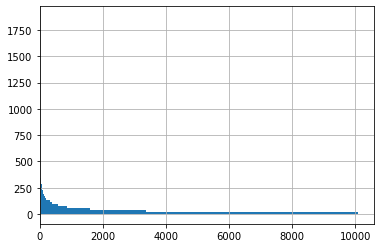

In [23]:
new_data.nb_review.hist(bins=100, orientation='horizontal',)

In [24]:
new_data = new_data.sort_values(by='nb_review', ascending=True)

In [25]:
alpha = 20000/750

In [26]:
new_data = new_data.sort_values(by='nb_review', ascending= False)

In [27]:
new_data = new_data[new_data['nb_review'] > 1]

In [28]:
new_data['test'] = new_data['nb_review'] * alpha

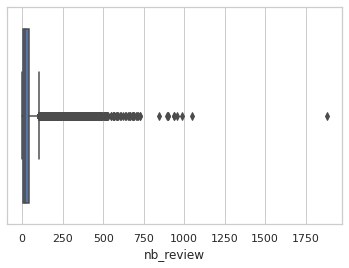

In [29]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=new_data,x="nb_review")

{'whiskers': [<matplotlib.lines.Line2D at 0x7f80f938c490>,
 'caps': [<matplotlib.lines.Line2D at 0x7f80f938ca30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f80f938c1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f80f938cfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f80f93992e0>],
 'means': []}

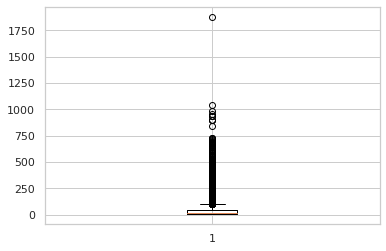

In [30]:
plt.boxplot(new_data['nb_review'])

In [31]:
new_data[['name', 'nb_review', 'test']].tail(50)

,name,nb_review,test
24572,Antistatic,2,53.333333
26303,Cartacombs,2,53.333333
26297,Candy Mandy,2,53.333333
24579,Xenia's Ark,2,53.333333
24582,Trends,2,53.333333
26295,Lyantei,2,53.333333
26293,Unravel Cyndy,2,53.333333
14682,Winter Wolves Classic Games Collection,2,53.333333
10712,Brawlderdash,2,53.333333
11879,Handy Dice,2,53.333333


# Encodage des certaines colonnes

Encodage des plateformes

In [32]:
ohe = OneHotEncoder(sparse = False)
ohe.fit(data[['platforms']])
platform_encoded = ohe.transform(data[['platforms']])

In [33]:
df1 = pd.DataFrame(platform_encoded)

In [34]:
data2 = data.join(df1)

In [35]:
data2.drop(columns='platforms', inplace= True)